# Q1 and Q3

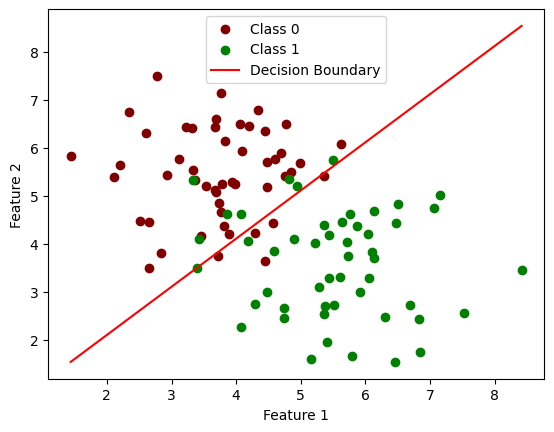

Theta0: 0.17443204359309333, Theta1: 1.9673889541713103, Theta2: -1.9591438202495897
Final Cost: 0.22834332960996867


In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data_x=pd.read_csv("logisticX.csv")
data_y=pd.read_csv("logisticY.csv")

X1=data_x['X1'].values
X2=data_x['X2'].values
Y=data_y['Y-values'].values

#Code can work without normalizing as well.
# X1=(X1-np.mean(X1))/np.std(X1)
# X2=(X2-np.mean(X2))/np.std(X2)

alpha=0.1
epochs=10000
th0,th1,th2=0,0,0

m=len(X1)

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def cost_function(th0, th1, th2, X1, X2, Y):
    h = sigmoid(th0 + th1 * X1 + th2 * X2)
    return -np.sum(Y * np.log(h) + (1 - Y) * np.log(1 - h)) / m

for epoch in range(epochs):
    pred = sigmoid(th0 + th1 * X1 + th2 * X2)
    error=pred-Y
    
    gradient_th0 = (1/m) * np.sum(error)
    gradient_th1 = (1/m) * np.sum((error) * X1)
    gradient_th2 = (1/m) * np.sum((error) * X2)

    th0 = th0 - alpha * gradient_th0
    th1 = th1 - alpha * gradient_th1
    th2 = th2 - alpha * gradient_th2

# Plot the decision boundary (assuming 0.5 as a threshold)
# plt.scatter(X1, X2, c=Y, cmap='viridis', label='Data Points')
plt.scatter(X1[Y == 0], X2[Y == 0], color='maroon', label='Class 0')
plt.scatter(X1[Y == 1], X2[Y == 1], color='Green', label='Class 1')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
# cost=cost_function(th0,th1,th2,4,5,)
decision_boundary_x = np.linspace(min(X1), max(X1), 100)
decision_boundary_y = (-1/th2)*(th0 + th1 * decision_boundary_x)
plt.plot(decision_boundary_x, decision_boundary_y, color='red', label='Decision Boundary')

plt.legend()
plt.show()

# Print the final parameters and the final cost
print(f"Theta0: {th0}, Theta1: {th1}, Theta2: {th2}")
final_cost = cost_function(th0, th1, th2, X1, X2, Y)
print(f"Final Cost: {final_cost}")

# For Q2 and Q5.

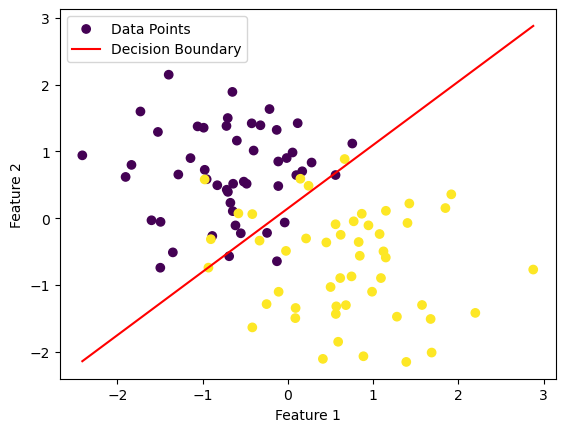

Theta0: 0.4012529278579288, Theta1: 2.58854709562992, Theta2: -2.725587813835302
Final Cost: 0.22834144984473004


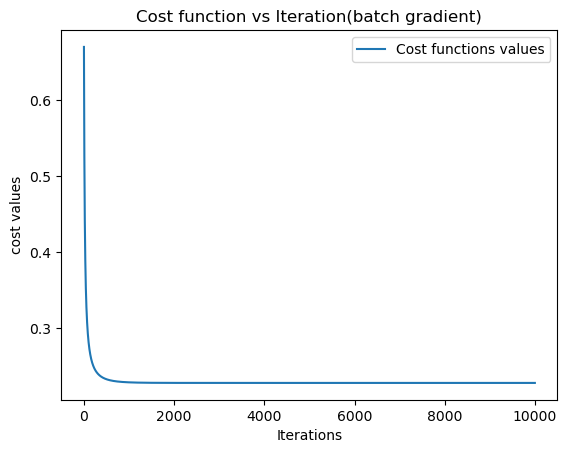

10000
10000
Confusion Matrix:
[[45  5]
 [ 7 43]]
Accuracy: 0.88
Precision: 0.8958333333333334
Recall: 0.86
F1-score: 0.8775510204081632


In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data_x=pd.read_csv("logisticX.csv")
data_y=pd.read_csv("logisticY.csv")

X1=data_x['X1'].values
X2=data_x['X2'].values
Y=data_y['Y-values'].values

#Code can work without normalizing as well.
X1=(X1-np.mean(X1))/np.std(X1)
X2=(X2-np.mean(X2))/np.std(X2)

alpha=0.1
epochs=10000
th0,th1,th2=0,0,0

m=len(X1)
cost=np.array([])
ep=np.array([])

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def cost_function(th0, th1, th2, X1, X2, Y):
    h = sigmoid(th0 + th1 * X1 + th2 * X2)
    return -np.sum(Y * np.log(h) + (1 - Y) * np.log(1 - h)) / m

for epoch in range(epochs):
    pred = sigmoid(th0 + th1 * X1 + th2 * X2)
    error=pred-Y
    
    gradient_th0 = (1/m) * np.sum(error)
    gradient_th1 = (1/m) * np.sum((error) * X1)
    gradient_th2 = (1/m) * np.sum((error) * X2)

    th0 = th0 - alpha * gradient_th0
    th1 = th1 - alpha * gradient_th1
    th2 = th2 - alpha * gradient_th2
    cost=np.append(cost,cost_function(th0,th1,th2,X1,X2,Y))


# Plot the decision boundary (assuming 0.5 as a threshold)
plt.scatter(X1, X2, c=Y, cmap='viridis', label='Data Points')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
# cost=cost_function(th0,th1,th2,4,5,)
decision_boundary_x = np.linspace(min(X1), max(X1), 100)
decision_boundary_y = (-1/th2)*(th0 + th1 * decision_boundary_x)
plt.plot(decision_boundary_x, decision_boundary_y, color='red', label='Decision Boundary')

plt.legend()
plt.show()

# Print the final parameters and the final cost
print(f"Theta0: {th0}, Theta1: {th1}, Theta2: {th2}")
final_cost = cost_function(th0, th1, th2, X1, X2, Y)
print(f"Final Cost: {final_cost}")

ep = np.arange(epochs)
plt.plot(ep,cost,label='Cost functions values')
plt.title('Cost function vs Iteration(batch gradient)')
plt.xlabel('Iterations')
plt.ylabel('cost values')
plt.legend()
plt.show()
print(ep.size)
print(cost.size)
# Make predictions based on the decision boundary
predictions = (sigmoid(th0 + th1 * X1 + th2 * X2) >= 0.5).astype(int)

# Calculate confusion matrix
true_negatives = np.sum((predictions == 0) & (Y == 0))
false_positives = np.sum((predictions == 1) & (Y == 0))
false_negatives = np.sum((predictions == 0) & (Y == 1))
true_positives = np.sum((predictions == 1) & (Y == 1))

conf_matrix = np.array([[true_negatives, false_positives],
                        [false_negatives, true_positives]])

# Calculate metrics
accuracy = (true_positives + true_negatives) / len(Y)
precision = true_positives / (true_positives + false_positives)
recall = true_positives / (true_positives + false_negatives)
f1 = 2 * (precision * recall) / (precision + recall)

# Print results
print("Confusion Matrix:")
print(conf_matrix)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)


# Q4 with learning rates 0.1 and 5

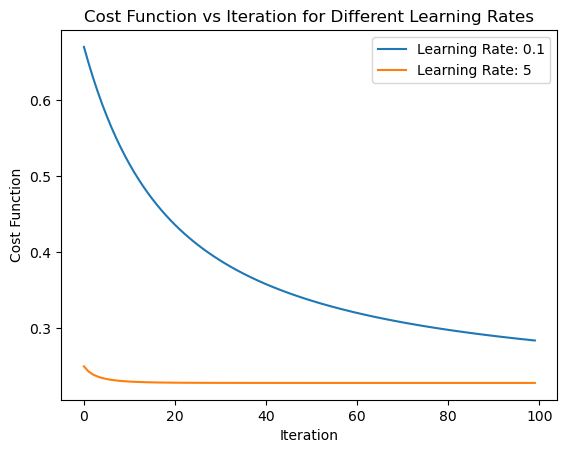

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
data_x = pd.read_csv("logisticX.csv")
data_y = pd.read_csv("logisticY.csv")

X1 = data_x['X1'].values
X2 = data_x['X2'].values
Y = data_y['Y-values'].values

#Code can work without normalizing as well.
X1=(X1-np.mean(X1))/np.std(X1)
X2=(X2-np.mean(X2))/np.std(X2)

alpha1 = 0.1
alpha2 = 5
epochs = 100

th0_1, th1_1, th2_1 = 0, 0, 0
th0_2, th1_2, th2_2 = 0, 0, 0

m = len(X1)
cost1 = np.array([])
cost2 = np.array([])
ep=np.array([])

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def cost_function(th0, th1, th2, X1, X2, Y):
    h = sigmoid(th0 + th1 * X1 + th2 * X2)
    return -np.sum(Y * np.log(h) + (1 - Y) * np.log(1 - h)) / m


# Training with learning rate 0.1
for epoch in range(epochs):
    pred = sigmoid(th0_1 + th1_1 * X1 + th2_1 * X2)
    error = pred - Y
    
    gradient_th0 = (1/m) * np.sum(error)
    gradient_th1 = (1/m) * np.sum((error) * X1)
    gradient_th2 = (1/m) * np.sum((error) * X2)

    th0_1 = th0_1 - alpha1 * gradient_th0
    th1_1 = th1_1 - alpha1 * gradient_th1
    th2_1 = th2_1 - alpha1 * gradient_th2
    
    cost1 = np.append(cost1,cost_function(th0_1, th1_1, th2_1, X1, X2, Y))

# Training with learning rate 5
for epoch in range(epochs):
    pred = sigmoid(th0_2 + th1_2 * X1 + th2_2 * X2)
    error = pred - Y
    
    gradient_th0 = (1/m) * np.sum(error)
    gradient_th1 = (1/m) * np.sum((error) * X1)
    gradient_th2 = (1/m) * np.sum((error) * X2)

    th0_2 = th0_2 - alpha2 * gradient_th0
    th1_2 = th1_2 - alpha2 * gradient_th1
    th2_2 = th2_2 - alpha2 * gradient_th2
    
    cost2 = np.append(cost2,cost_function(th0_2, th1_2, th2_2, X1, X2, Y))


# Plot cost-function v/s iteration curve for both learning rates
# print(cost_1)
ep=np.arange(epochs)
plt.plot(ep, cost1, label='Learning Rate: {}'.format(alpha1))
plt.plot(ep, cost2, label='Learning Rate: {}'.format(alpha2))
plt.xlabel('Iteration')
plt.ylabel('Cost Function')
plt.title('Cost Function vs Iteration for Different Learning Rates')
plt.legend()
plt.show()


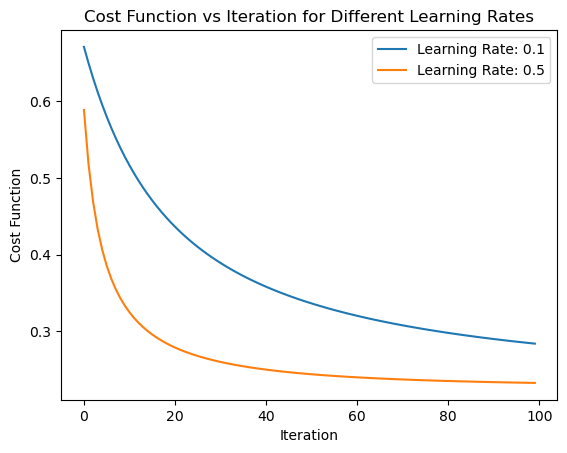

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
data_x = pd.read_csv("logisticX.csv")
data_y = pd.read_csv("logisticY.csv")

X1 = data_x['X1'].values
X2 = data_x['X2'].values
Y = data_y['Y-values'].values

#Code can work without normalizing as well.
X1=(X1-np.mean(X1))/np.std(X1)
X2=(X2-np.mean(X2))/np.std(X2)

# Initialize parameters
alpha1 = 0.1
alpha2 = 0.5
epochs = 100

th0_1, th1_1, th2_1 = 0, 0, 0
th0_2, th1_2, th2_2 = 0, 0, 0

m = len(X1)
cost1 = np.array([])
cost2 = np.array([])
ep=np.array([])

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def cost_function(th0, th1, th2, X1, X2, Y):
    h = sigmoid(th0 + th1 * X1 + th2 * X2)
    return -np.sum(Y * np.log(h) + (1 - Y) * np.log(1 - h)) / m


# Training with learning rate 0.1
for epoch in range(epochs):
    pred = sigmoid(th0_1 + th1_1 * X1 + th2_1 * X2)
    error = pred - Y
    
    gradient_th0 = (1/m) * np.sum(error)
    gradient_th1 = (1/m) * np.sum((error) * X1)
    gradient_th2 = (1/m) * np.sum((error) * X2)

    th0_1 = th0_1 - alpha1 * gradient_th0
    th1_1 = th1_1 - alpha1 * gradient_th1
    th2_1 = th2_1 - alpha1 * gradient_th2
    
    cost1 = np.append(cost1,cost_function(th0_1, th1_1, th2_1, X1, X2, Y))

# Training with learning rate 5
for epoch in range(epochs):
    pred = sigmoid(th0_2 + th1_2 * X1 + th2_2 * X2)
    error = pred - Y
    
    gradient_th0 = (1/m) * np.sum(error)
    gradient_th1 = (1/m) * np.sum((error) * X1)
    gradient_th2 = (1/m) * np.sum((error) * X2)

    th0_2 = th0_2 - alpha2 * gradient_th0
    th1_2 = th1_2 - alpha2 * gradient_th1
    th2_2 = th2_2 - alpha2 * gradient_th2
    
    cost2 = np.append(cost2,cost_function(th0_2, th1_2, th2_2, X1, X2, Y))


# Plot cost-function v/s iteration curve for both learning rates
# print(cost_1)
ep=np.arange(epochs)
plt.plot(ep, cost1, label='Learning Rate: {}'.format(alpha1))
plt.plot(ep, cost2, label='Learning Rate: {}'.format(alpha2))
plt.xlabel('Iteration')
plt.ylabel('Cost Function')
plt.title('Cost Function vs Iteration for Different Learning Rates')
plt.legend()
plt.show()
